In [1]:
import pandas as pd #data manipulation
import numpy as np #working with array
import matplotlib.pyplot as plt #plot 2D graphs
import seaborn as sns # data visulization
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve,f1_score,precision_score,recall_score,accuracy_score
from sklearn import metrics

# Pre-Processing

In [2]:
loan_data=pd.read_csv("loan_approval_dataset.csv")
loan_data

,loan_id,no_of_dependents,education,self_employed,income_annum,LoanAmount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,LoanAmount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
loan_data.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,LoanAmount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    LoanAmount                4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
loan_data.describe()

,loan_id,no_of_dependents,income_annum,LoanAmount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
loan_data.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 LoanAmount                   int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [8]:
loan_data.duplicated().sum()

0

In [9]:
loan_data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 LoanAmount                  0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [10]:
print(loan_data.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' LoanAmount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [11]:
loan_data.shape

(4269, 13)

# IQR

In [12]:
Q1=np.percentile(loan_data[' LoanAmount'],25,interpolation='midpoint')
Q3=np.percentile(loan_data[' LoanAmount'],75,interpolation='midpoint')
IQR=Q3-Q1
IQR

13800000.0

In [13]:
lower_bound = np.where(loan_data[' LoanAmount']<=(Q1 - 1.5 * IQR))
lower_bound


(array([], dtype=int64),)

In [14]:
upper_bound = np.where(loan_data[' LoanAmount']>=(Q3 + 1.5 * IQR))
upper_bound

(array([], dtype=int64),)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' LoanAmount'>

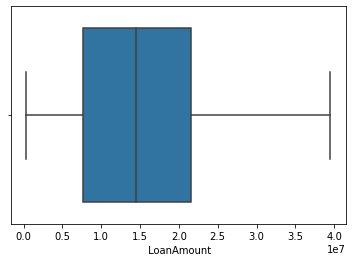

In [15]:
sns.boxplot(loan_data[' LoanAmount'])

# Plotting the releation between the Attributes

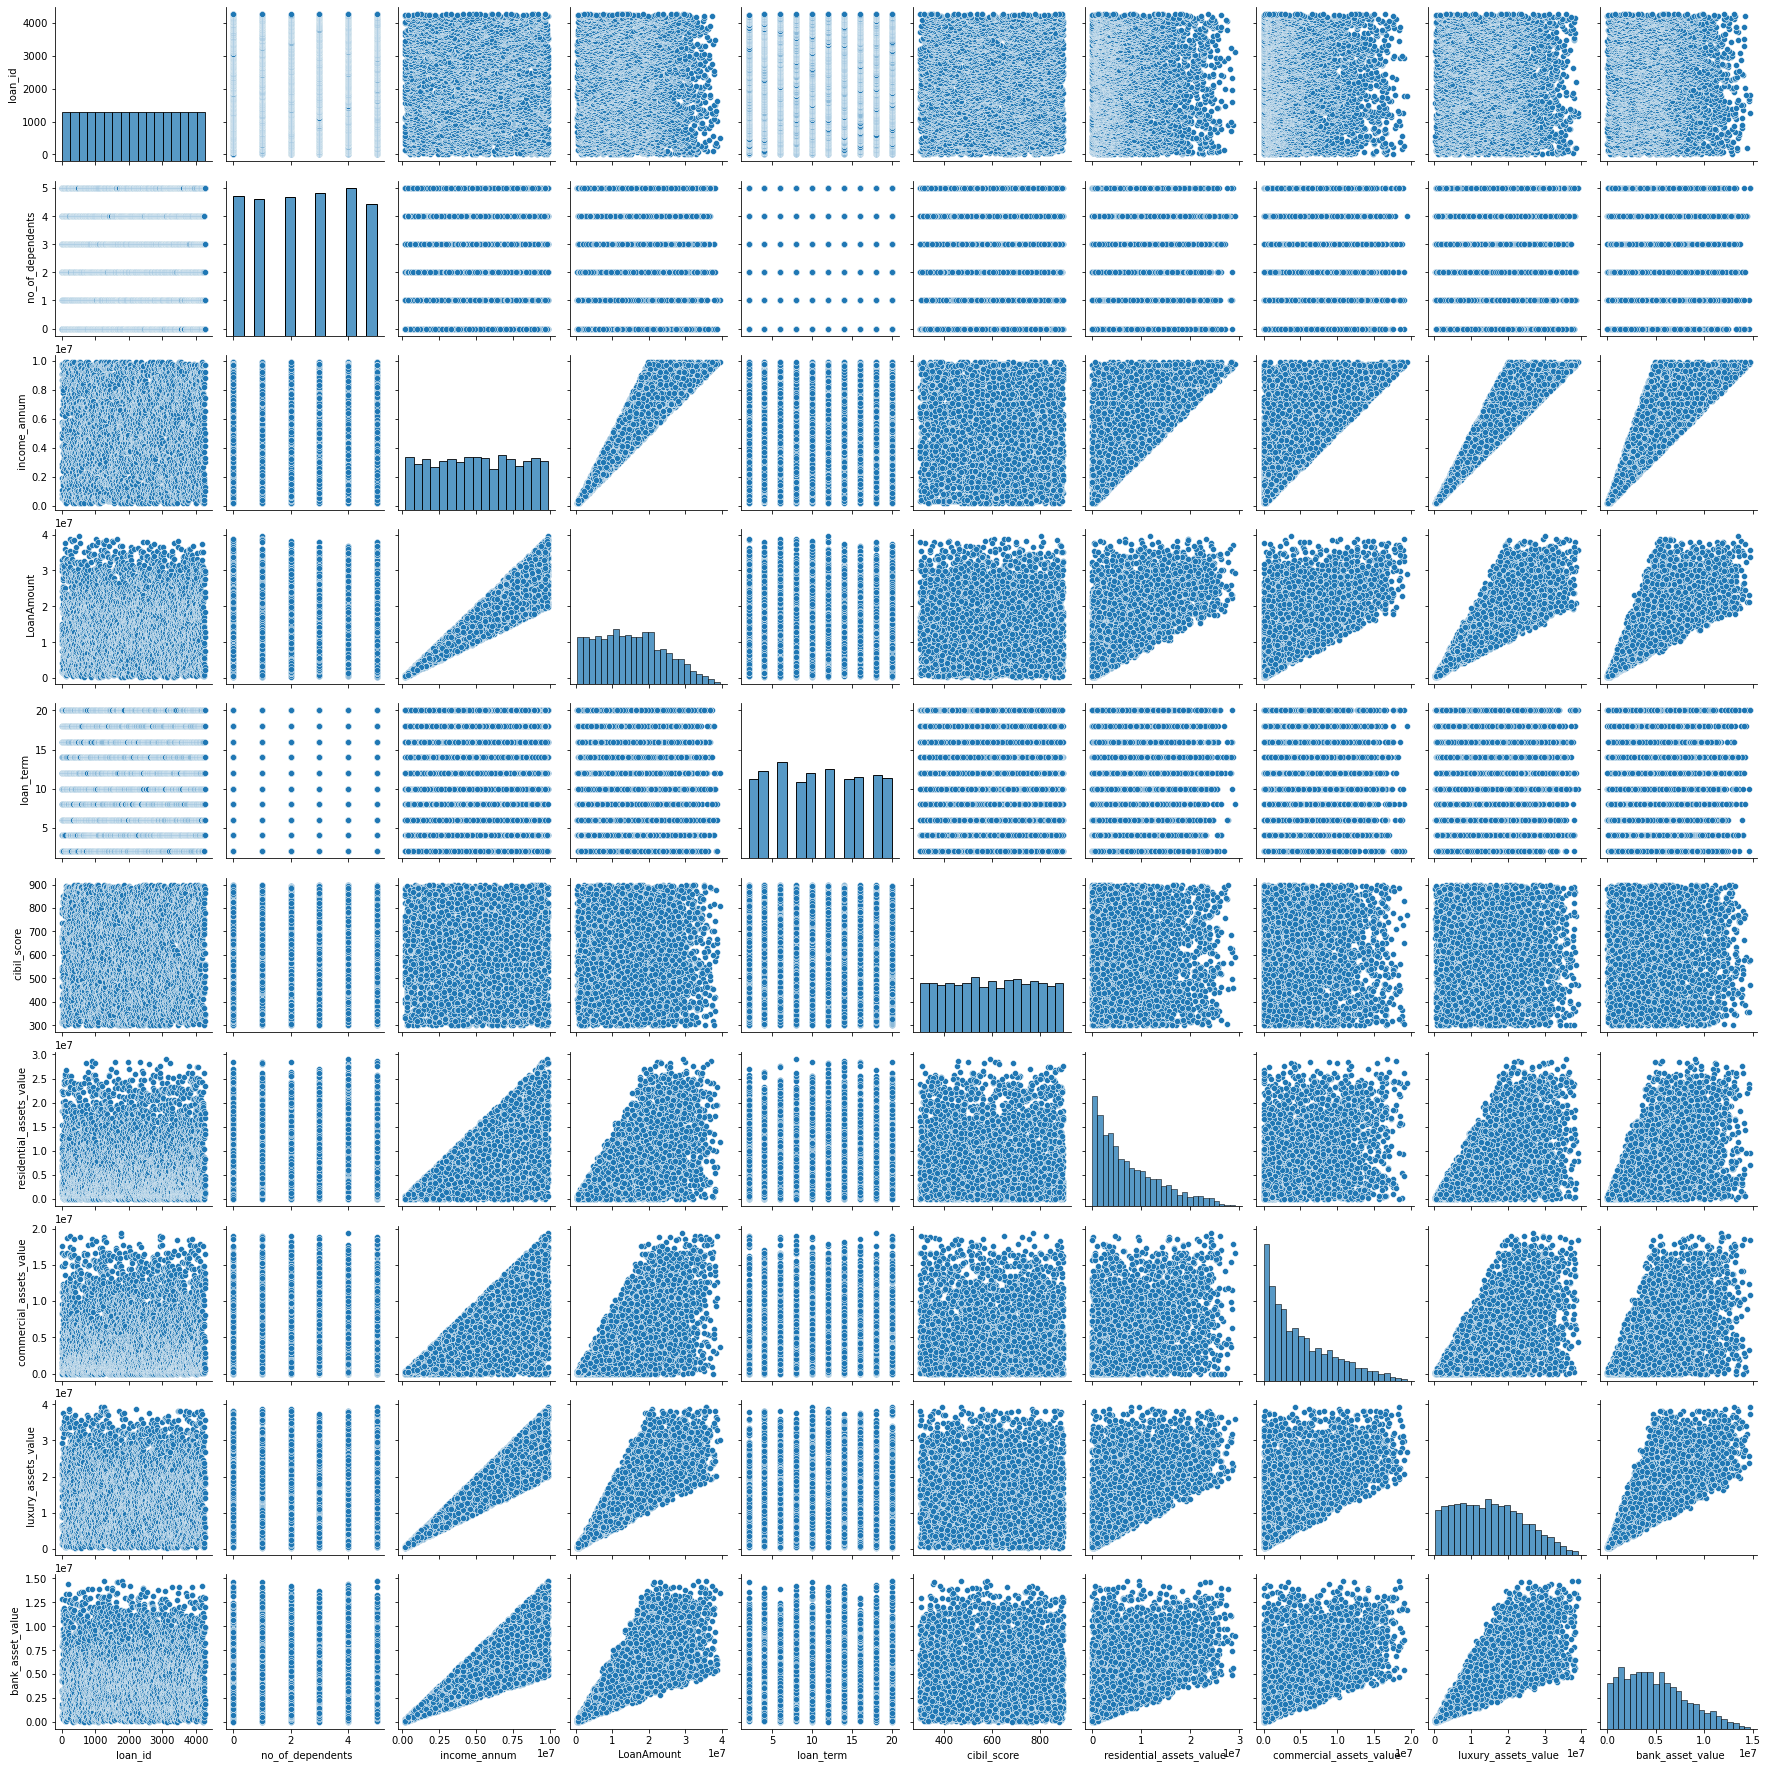

In [16]:
sns.pairplot(loan_data)

Number of people who take loan as group of Dependents:
4    752
3    727
0    712
2    708
1    697
5    673
Name:  no_of_dependents, dtype: int64


<AxesSubplot:xlabel=' no_of_dependents', ylabel='count'>

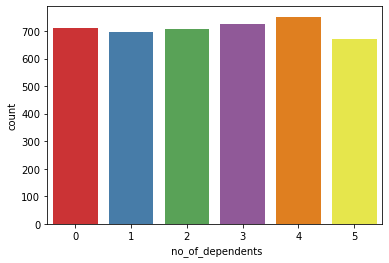

In [17]:
print("Number of people who take loan as group of Dependents:")
print(loan_data[' no_of_dependents'].value_counts())
sns.countplot(x=' no_of_dependents',data=loan_data,palette='Set1')

Number of people who take loan as group of Self_Employed:
 Yes    2150
 No     2119
Name:  self_employed, dtype: int64


<AxesSubplot:xlabel=' self_employed', ylabel='count'>

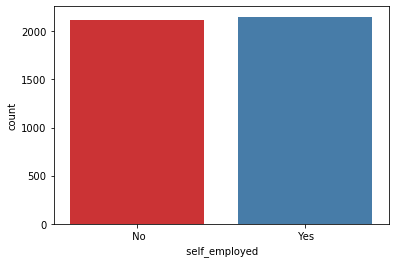

In [18]:
print("Number of people who take loan as group of Self_Employed:")
print(loan_data[' self_employed'].value_counts())
sns.countplot(x=' self_employed',data=loan_data,palette='Set1')

Number of people who take loan as group of LoanAmount:
10600000    27
20000000    24
9400000     24
16800000    23
23900000    23
            ..
35800000     1
38500000     1
39500000     1
38800000     1
36100000     1
Name:  LoanAmount, Length: 378, dtype: int64


<AxesSubplot:xlabel=' LoanAmount', ylabel='count'>

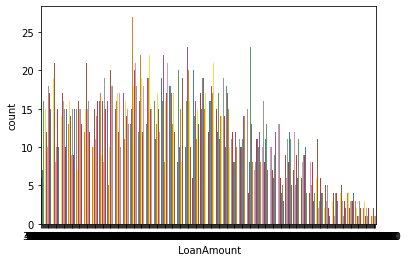

In [19]:
print("Number of people who take loan as group of LoanAmount:")
print(loan_data[' LoanAmount'].value_counts())
sns.countplot(x=' LoanAmount',data=loan_data,palette='Set1')
#plt.hist(loan_data['LoanAmount'])

# Data Labelling

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [21]:
loan_data[' education']= label_encoder.fit_transform(loan_data[' education']) 
loan_data[' loan_status']= label_encoder.fit_transform(loan_data[' loan_status']) 
loan_data[' self_employed']= label_encoder.fit_transform(loan_data[' self_employed']) 

# Train_Test_Split

In [22]:
x = loan_data.drop(['loan_id', ' loan_status'], axis=1)
y = loan_data[' loan_status']

In [23]:
x

,no_of_dependents,education,self_employed,income_annum,LoanAmount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [24]:
y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name:  loan_status, Length: 4269, dtype: int32

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [26]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [27]:
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

# RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
y_RFC_pred=RFC.predict(x_test)
y_RFC_pred

array([1, 0, 0, ..., 1, 1, 0])

In [67]:
print("Accuracy of random forest clf is")
RFC_p=metrics.precision_score(y_test, y_RFC_pred)
RFC_r=metrics.recall_score(y_test, y_RFC_pred)
RFC_a=metrics.accuracy_score(y_test, y_RFC_pred)
RFC_f1=metrics.f1_score(y_test, y_RFC_pred)
print("precision_score:",RFC_p)
print("recall_score:",RFC_r)
print("accuracy_score:",RFC_a)
print("f1_score:",RFC_f1)


Accuracy of random forest clf is
precision_score: 0.9678111587982833
recall_score: 0.9074446680080482
accuracy_score: 0.9523809523809523
f1_score: 0.936656282450675


In [31]:
cm=confusion_matrix(y_test,y_RFC_pred)
cm

array([[769,  15],
       [ 46, 451]], dtype=int64)

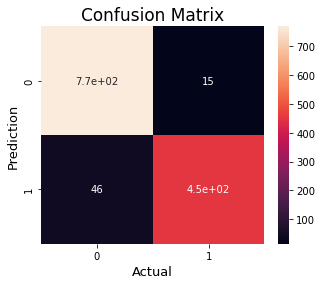

In [32]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, 
            annot=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# DecisionTree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
y_DTC_pred=DTC.predict(x_test)
y_DTC_pred

array([1, 0, 0, ..., 1, 1, 0])

In [68]:
print("Accuracy of Decision Tree Classification is")
DTC_p=metrics.precision_score(y_test, y_DTC_pred)
DTC_r=metrics.recall_score(y_test, y_DTC_pred)
DTC_a=metrics.accuracy_score(y_test, y_DTC_pred)
DTC_f1=metrics.f1_score(y_test, y_DTC_pred)
print("precision_score:",DTC_p)
print("recall_score:",DTC_r)
print("accuracy_score:",DTC_a)
print("f1_score:",DTC_f1)

Accuracy of Decision Tree Classification is
precision_score: 0.9723404255319149
recall_score: 0.9195171026156942
accuracy_score: 0.9586260733801717
f1_score: 0.9451913133402275


In [37]:
cm2=confusion_matrix(y_test,y_DTC_pred)
cm2

array([[771,  13],
       [ 40, 457]], dtype=int64)

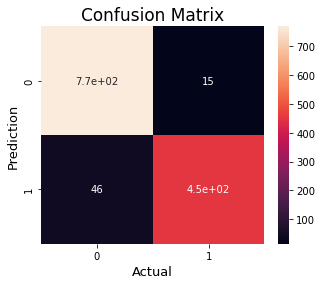

In [38]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, 
            annot=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [58]:
lr_pred=lr.predict(x_test)
lr_pred

array([0, 0, 0, ..., 1, 1, 0])

In [69]:
print("Accuracy of Logistic Regression is")
lr_p=metrics.precision_score(y_test, lr_pred)
lr_r=metrics.recall_score(y_test, lr_pred)
lr_a=metrics.accuracy_score(y_test,lr_pred)
lr_f1=metrics.f1_score(y_test,lr_pred)
print("precision_score:",lr_p)
print("recall_score:",lr_r)
print("accuracy_score:",lr_a)
print("f1_score:",lr_f1)

Accuracy of Logistic Regression is
precision_score: 0.8823529411764706
recall_score: 0.8450704225352113
accuracy_score: 0.8961748633879781
f1_score: 0.8633093525179857


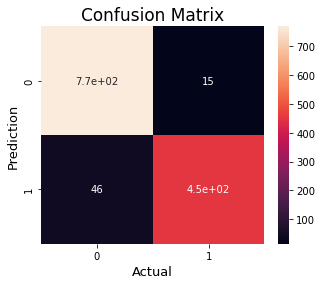

In [70]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, 
            annot=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [75]:
accuracy_scores = {
    "Random Forest": RFC_a,
    "Decision Tree": DTC_a,
    "Logistic Regression": lr_a
}

In [76]:
results_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Algorithm', 'Accuracy'])

results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print(results_df) 

             Algorithm  Accuracy
0        Decision Tree  0.958626
1        Random Forest  0.952381
2  Logistic Regression  0.896175


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithm', ylabel='Accuracy'>

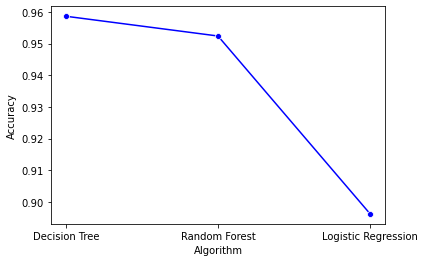

In [78]:
sns.lineplot(results_df['Algorithm'],results_df['Accuracy'],marker='o',color='b')

# As per the above graph the Decision Tree is the best algorithm to predict the loan approval